<a href="https://colab.research.google.com/github/youssefkamil/Arabic-Dialect-Identification/blob/main/DL_(AraBERT)_NLP_Arabic_Dialect_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Lib

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 3.9 MB/s 
     |████████████████████████████████| 596 kB 28.1 MB/s 
     |████████████████████████████████| 895 kB 45.4 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 6.5 MB 26.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#Load cleaned data

In [ ]:
clean_df_train=pd.read_csv('/content/drive/MyDrive/Arabic Dialect/cleaned tweets train set 2.csv',lineterminator='\n')
clean_df_test=pd.read_csv('/content/drive/MyDrive/Arabic Dialect/cleaned tweets Test set 2.csv',lineterminator='\n')

In [ ]:
clean_df_train=clean_df_train.dropna()
clean_df_test=clean_df_test.dropna()

In [ ]:
x_train=clean_df_train['tweet']
y_train=pd.get_dummies(clean_df_train['dialect'])
x_test=clean_df_test['tweet']
y_test=pd.get_dummies(clean_df_test['dialect'])

#Class Weight
To deal with imbalance dataset

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(np.argmax(y_train.values,axis=1)),
                                                 y=np.argmax(y_train.values,axis=1))

class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.9684678362573099,
 1: 0.9684678362573099,
 2: 1.5786623960954778,
 3: 0.4402969201973796,
 4: 1.6466789601185956,
 5: 0.9113944822672895,
 6: 0.6031136855431867,
 7: 0.9204126094882398,
 8: 0.6964086378635936,
 9: 2.2240877480856382,
 10: 1.332134061086833,
 11: 0.580502976304284,
 12: 0.8184919197147458,
 13: 0.9480374034106048,
 14: 1.7772704567450281,
 15: 1.5726766672191834,
 16: 2.770004622533635,
 17: 2.5891549552008004}

#**Ktrain**

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3 MB 55.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 20.3 MB/s 
     |████████████████████████████████| 263 kB 48.2 MB/s 
     |████████████████████████████████| 2.8 MB 38.5 MB/s 
     |████████████████████████████████| 1.2 MB 34.5 MB/s 
     |████████████████████████████████| 468 kB 46.8 MB/s 
     |████████████████████████████████| 895 kB 38.7 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 3.3 MB 33.5 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.29.3-py3-none-any.whl size=25295410 sha256=09920fac421d987ade3ad007845cf18e4ed31d3f44105a3171a1f3d292a3ed7a
  Stored in directory: /root/.cache/pip/wheels/04/d5/2a/1a1826e16685841c68a43c31c8a892452b105f9467f64e49e6
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9931 sha256=217554e94cd12a7

In [ ]:
import os.path
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
classes=y_train.columns.tolist()

In [ ]:
classes

['AE',
 'BH',
 'DZ',
 'EG',
 'IQ',
 'JO',
 'KW',
 'LB',
 'LY',
 'MA',
 'OM',
 'PL',
 'QA',
 'SA',
 'SD',
 'SY',
 'TN',
 'YE']

##Transformer

In [ ]:
t = text.Transformer('aubmindlab/bert-base-arabertv2', maxlen=76, class_names=classes)
trn = t.preprocess_train(x_train.to_numpy(), y_train.to_numpy())
val = t.preprocess_test(x_test.to_numpy(), y_test.to_numpy())

Downloading:   0%|          | 0.00/384 [00:00<?, ?B/s]

preprocessing train...
language: ar
train sequence lengths:
	mean : 20
	95percentile : 52
	99percentile : 76


Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/720k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 20
	95percentile : 53
	99percentile : 76


In [ ]:
model = t.get_classifier()

In [ ]:
model.load_weights('/content/drive/MyDrive/Arabic Dialect/ktrain model bert-base-arabertv2 V0.2/weights-30.hdf5')

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  135193344 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  13842     
                                                                 
Total params: 135,207,186
Trainable params: 135,207,186
Non-trainable params: 0
_________________________________________________________________


##Learner

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=64)

In [ ]:
learner.fit(5e-5, 50, steps_per_epoch=300,
            checkpoint_folder='/content/drive/MyDrive/Arabic Dialect/ktrain model bert-base-arabertv2 V0.4',
            # class_weight=class_weights
            )

##Save Predictor

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.save('/content/drive/MyDrive/Arabic Dialect/Final model')

##Confusion matrix

In [ ]:
cf_matrix=learner.validate(val_data=val, class_names=classes)

              precision    recall  f1-score   support

          AE       0.47      0.51      0.49       192
          BH       0.35      0.45      0.39       184
          DZ       0.65      0.64      0.64       170
          EG       0.67      0.89      0.77       200
          IQ       0.90      0.56      0.69       178
          JO       0.45      0.38      0.41       180
          KW       0.47      0.47      0.47       190
          LB       0.67      0.73      0.70       194
          LY       0.63      0.79      0.70       169
          MA       0.86      0.74      0.79       178
          OM       0.49      0.63      0.55       169
          PL       0.41      0.56      0.48       173
          QA       0.51      0.53      0.52       198
          SA       0.41      0.54      0.46       199
          SD       0.91      0.71      0.80       188
          SY       0.71      0.41      0.52       194
          TN       0.88      0.48      0.62       154
          YE       0.51    

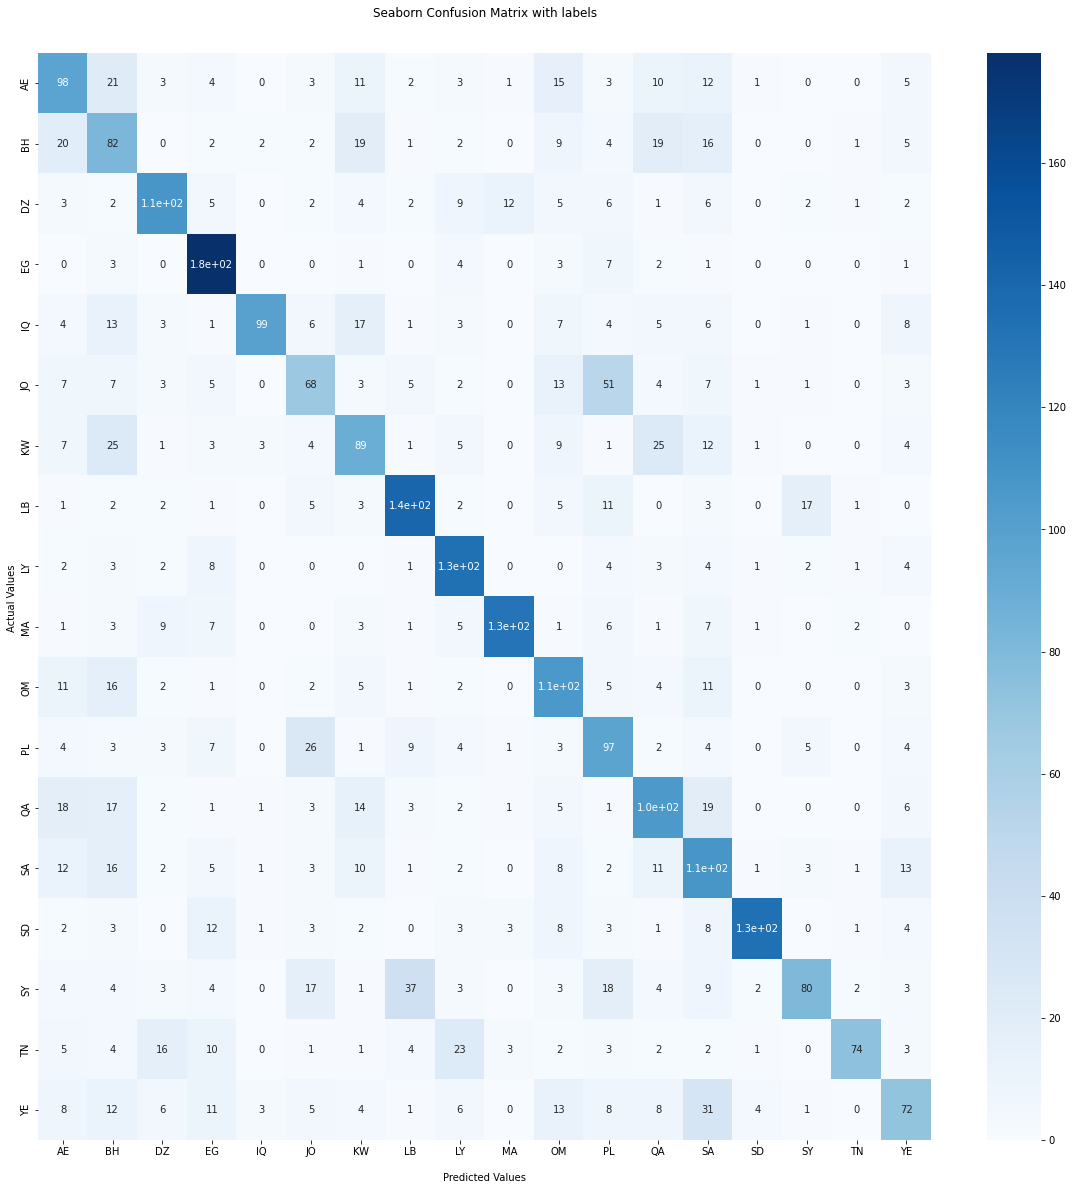

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xticklabels( classes)
ax.set_yticklabels( classes)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()


##Test some texts

In [ ]:
# ktrain.get_predictor(model, t).save('/content/drive/MyDrive/Arabic Dialect/ktrain model')

In [ ]:
i=0
for i in range(50):
  pred=predictor.predict(clean_df_test['tweet'][i],return_proba=True)
  print(classes[np.argmax(pred)],clean_df_test['dialect'][i])

LB PL
JO PL
SA SA
EG EG
YE YE
KW YE
IQ IQ
BH BH
LB SY
YE YE
JO YE
PL PL
LB SY
LB LB
QA SY
AE AE
BH SA
SY SY
AE OM
TN TN
AE AE
OM AE
SA SA
JO JO
KW KW
SD SD
SY SY
KW KW
KW QA
IQ IQ
PL JO
IQ IQ
AE QA
MA MA
EG EG
JO KW
MA TN
SY LB
PL SY
PL JO
YE YE
EG EG
DZ MA
LB LB
SY DZ
KW DZ
QA QA
BH DZ
EG EG
YE SY


In [ ]:
tweet_number=0
for tweet_number in range(1000):
  pred=predictor.predict(clean_df_test['tweet'][tweet_number],return_proba=True)
  print("\ntweet : ",clean_df_test['tweet'][tweet_number])
  print("Actual : ",clean_df_test['dialect'][tweet_number])
  print("prediction : ",classes[np.argmax(pred)])


tweet :  ام لا لا ماشي حالو
Actual :  PL
prediction :  LB

tweet :  يا عم لو يحكولي سافر شالح حوافق بس سفروني
Actual :  PL
prediction :  JO

tweet :  ه قرار اقفال ال+ محل +ات ال+ ساعه كان في +ه فواءد أكثر من ذي
Actual :  SA
prediction :  SA

tweet :  عند +نا بيسجلو مواد إنساني عشان ترفعلهم ال رد +ت في صدر +هم و اجلو امتحان +ات ال+ إنساني و هيخلصو آخر ناس
Actual :  EG
prediction :  EG

tweet :  يا فدي +ت بنت ال+ يمن و+ صوت +ها و+ اله يجن رب +ي يحفظ هالصوت و+ يحفظ وطن +ا ال+ يمن ال+ غالي
Actual :  YE
prediction :  YE

tweet :  عن نفس +ي ماشفت شي
Actual :  YE
prediction :  KW

tweet :  زين شنو ال+ فاءده شنو هالغباء الي صاير ب+ عقل ال+ بن +ات
Actual :  IQ
prediction :  IQ

tweet :  هذا الي يقول ل+ +ك يموت و+ لا ينسى
Actual :  BH
prediction :  BH

tweet :  ب+ تحب فرج +ي +ك قديش اشقر أنت لو ب+ تموت ما رح محي ال+ صور
Actual :  SY
prediction :  LB

tweet :  ال+ ناس الي تلوم نفس +ها الي تسامح ب+ سهول +ه الي ماتغلط علي أحد الي تصبر كثير الي يحب +ون من قلب اقول +كم شي محد يستاهلكم
Actual :  YE
p

In [ ]:
# !pip install -q --upgrade onnxruntime==1.10.0 onnx sympy tf2onnx


predictor.export_model_to_onnx('/content/drive/MyDrive/Arabic Dialect/onnx')

converting to ONNX format by way of TFLite ... this may take a few moments...
converting to TFLite format ... this may take a few moments...
----------------------------------------------
NOTE: For Hugging Face models, please ensure you use return_tensors="tf" and padding="max_length" when encoding your inputs.
----------------------------------------------


INFO:absl:Using new converter: If you encounter a problem please file a bug. You can opt-out by setting experimental_new_converter=False


done.
converting to ONNX using tf2onnx...
2

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
usage: convert.py [-h] [--input INPUT] [--graphdef GRAPHDEF]
                  [--saved-model SAVED_MODEL] [--tag TAG]
                  [--signature_def SIGNATURE_DEF]
                  [--concrete_function CONCRETE_FUNCTION]
                  [--checkpoint CHECKPOINT] [--keras KERAS] [--tflite TFLITE]
                  [--tfjs TFJS] [--large_model] [--output OUTPUT]
                  [--inputs INPUTS] [--outputs OUTPUTS]
                  [--ignore_default IGNORE_DEFAULT]
                  [--use_default USE_DEFAULT] [--rename-inputs RENAME_INPUTS]
                  [--rename-outputs RENAME_OUTPUTS] [--use-graph-names]
                  [--opset OPSET] [--dequantize] [--custom-ops CUSTOM_OPS]
            

'/content/drive/MyDrive/Arabic Dialect/onnx'

#Pytorch
##Needs more time to train

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80
Mon Mar 14 01:38:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    33W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                           

##Creating training datasets

In [ ]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

In [ ]:
class CustomDataset:
    def __init__(
        self,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["tweet","dialect"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["tweet","dialect"]
        label_list (List[str]): holds the list  of labels
        """
        self.train = train
        self.test = test
        self.label_list = label_list

In [ ]:
# This will hold all the downloaded and structred datasets
DATA_COLUMN = "tweet"
LABEL_COLUMN = "dialect"

###Dataset

In [ ]:
label_list = list(clean_df_train[LABEL_COLUMN].unique())

print("Training length: ", len(clean_df_train))
print("Testing length: ", len(clean_df_test))

data_set = CustomDataset(clean_df_train, clean_df_test, label_list)


Training length:  455422
Testing length:  3303


In [ ]:
data_set.test

,Unnamed: 0,tweet,dialect
0,0,ام لا لا ماشي حالو,PL
1,1,يا عم لو يحكولي سافر شالح حوافق بس سفروني,PL
2,2,ه قرار اقفال ال+ محل +ات ال+ ساعه كان في +ه فو...,SA
3,3,عند +نا بيسجلو مواد إنساني عشان ترفعلهم ال رد ...,EG
4,4,يا فدي +ت بنت ال+ يمن و+ صوت +ها و+ اله يجن رب...,YE
...,...,...,...
3298,3498,ياستي ابوس ايدك ماتسوقيش صور +ت +نا اكتر ماهي ...,EG
3299,3499,و+ نعم في +كم يابو فيحان,SA
3300,3500,مش عارف بس ال+ عيل ل+ عيب ب+ كل,LY
3301,3501,ب+ ال+ ضبط كدا ال+ ناس لازم تضغط اكتر علي ال+ ...,SD


##Trainer

In [ ]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments, PreTrainedModel,
                          AutoModel)
from transformers.data.processors.utils import InputFeatures

In [ ]:
model_name = 'aubmindlab/bert-base-arabertv2'

In [ ]:
tok = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/384 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/703k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Training Sentence Lengths: 


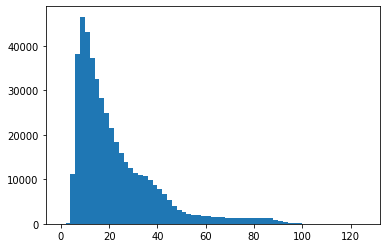

Testing Sentence Lengths: 


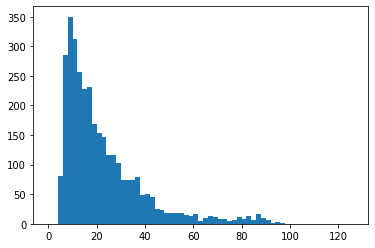

In [ ]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in x_train],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in x_test],bins=range(0,128,2))
plt.show()

In [ ]:
max_len = 76

In [ ]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in x_train]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in x_test]))

Truncated training sequences:  9588
Truncated testing sequences:  81


In [ ]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
      super(ClassificationDataset).__init__()
      """
      Args:
      text (List[str]): List of the training text
      target (List[str]): List of the training labels
      tokenizer_name (str): The tokenizer name (same as model_name).
      max_len (int): Maximum sentence length
      label_map (Dict[str,int]): A dictionary that maps the class labels to integer
      """
      self.text = text
      self.target = target
      self.tokenizer_name = model_name
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.max_len = max_len
      self.label_map = label_map
      

    def __len__(self):
      return len(self.text)

    def __getitem__(self,item):
      text = str(self.text[item])
      text = " ".join(text.split())
        
      inputs = self.tokenizer(
          text,
          max_length=self.max_len,
          padding='max_length',
          truncation=True
      )      
      return InputFeatures(**inputs,label=self.label_map[self.target[item]])

In [ ]:
label_map = { v:index for index, v in enumerate(data_set.label_list) }
print(label_map)

train_dataset = ClassificationDataset(
    data_set.train[DATA_COLUMN].to_list(),
    data_set.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )
test_dataset = ClassificationDataset(
    data_set.test[DATA_COLUMN].to_list(),
    data_set.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )

{'IQ': 0, 'LY': 1, 'QA': 2, 'PL': 3, 'SY': 4, 'TN': 5, 'JO': 6, 'MA': 7, 'SA': 8, 'YE': 9, 'DZ': 10, 'EG': 11, 'LB': 12, 'KW': 13, 'OM': 14, 'SD': 15, 'AE': 16, 'BH': 17}


In [ ]:
train_dataset

In [ ]:
print(next(iter(train_dataset)))

InputFeatures(input_ids=[2, 139, 17, 12682, 17, 141, 139, 17, 19181, 421, 1732, 15034, 1650, 9016, 1016, 509, 17, 627, 3775, 17, 112, 113, 17, 2568, 298, 17, 4835, 2078, 192, 17, 799, 19120, 350, 1684, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name,
                                                              return_dict=True,
                                                              num_labels=len(label_map)
                                                              )

In [ ]:
def compute_metrics(p): #p should be of type EvalPrediction
  preds = np.argmax(p.predictions, axis=1)
  assert len(preds) == len(p.label_ids)
  print(classification_report(p.label_ids,preds))
  # print(confusion_matrix(p.label_ids,preds))
  macro_f1 = f1_score(p.label_ids,preds,average='macro')
  macro_precision = precision_score(p.label_ids,preds,average='macro')
  macro_recall = recall_score(p.label_ids,preds,average='macro')
  acc = accuracy_score(p.label_ids,preds)
  return {       
      'macro_f1' : macro_f1,
      'accuracy': acc
  }

In [ ]:
def set_seed(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

88

In [ ]:
training_args = TrainingArguments( 
    output_dir= "/content/drive/MyDrive/Arabic Dialect/pytorch",   #path to save checkpoints 
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = False,
    per_device_train_batch_size = 64,
    per_device_eval_batch_size = 64,
    gradient_accumulation_steps = 2, # use this to scale batch size without needing more memory
    num_train_epochs= 2,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'steps',
    save_strategy = 'steps',
    # load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 25,
    logging_steps =1000,  #Validate every 1000 Steps
    save_steps =1000      #save every 1000 Steps
  )

set_seed(training_args.seed)

In [ ]:
trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

loading configuration file https://huggingface.co/aubmindlab/bert-base-arabertv2/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/fcf7a61cc072840ad32e1a2e8eb230a79b33db68e3f965f8014a52915cab999f.2f0d0092105af7b8b42b899ffb7f801dc48e93516d509483f6cfbd86155d49ea
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv2",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17"
  },
  "initializer_range": 0.02,
  "intermediate

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 455422
  Num Epochs = 2
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 2
  Total optimization steps = 7116


Step,Training Loss,Validation Loss,Macro F1,Accuracy
1000,2.012700,1.854184,0.403405,0.409325
2000,1.741900,1.727789,0.449634,0.451408
3000,1.643600,1.581125,0.483273,0.487436


***** Running Evaluation *****
  Num examples = 3303
  Batch size = 64


              precision    recall  f1-score   support

           0       0.80      0.38      0.52       178
           1       0.37      0.51      0.43       169
           2       0.36      0.43      0.39       198
           3       0.24      0.68      0.36       173
           4       0.59      0.17      0.26       194
           5       0.87      0.30      0.44       154
           6       0.31      0.17      0.22       180
           7       0.74      0.60      0.66       178
           8       0.34      0.36      0.35       199
           9       0.73      0.14      0.23       193
          10       0.54      0.38      0.44       170
          11       0.55      0.81      0.66       200
          12       0.50      0.66      0.57       194
          13       0.27      0.48      0.35       190
          14       0.33      0.18      0.23       169
          15       0.88      0.60      0.71       188
          16       0.19      0.36      0.25       192
          17       0.24    

Saving model checkpoint to /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-1000
Configuration saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3303
  Batch size = 64


              precision    recall  f1-score   support

           0       0.83      0.49      0.62       178
           1       0.36      0.69      0.47       169
           2       0.34      0.49      0.40       198
           3       0.31      0.67      0.42       173
           4       0.64      0.28      0.39       194
           5       0.83      0.35      0.49       154
           6       0.38      0.24      0.29       180
           7       0.86      0.59      0.70       178
           8       0.35      0.35      0.35       199
           9       0.78      0.17      0.27       193
          10       0.66      0.28      0.39       170
          11       0.53      0.88      0.66       200
          12       0.63      0.66      0.65       194
          13       0.28      0.52      0.36       190
          14       0.37      0.39      0.38       169
          15       0.95      0.55      0.70       188
          16       0.34      0.24      0.28       192
          17       0.24    

Saving model checkpoint to /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-2000
Configuration saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-2000/config.json
Model weights saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-2000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3303
  Batch size = 64


              precision    recall  f1-score   support

           0       0.71      0.59      0.65       178
           1       0.44      0.65      0.53       169
           2       0.44      0.43      0.44       198
           3       0.35      0.59      0.44       173
           4       0.66      0.31      0.43       194
           5       0.76      0.44      0.56       154
           6       0.35      0.28      0.31       180
           7       0.72      0.65      0.68       178
           8       0.30      0.59      0.40       199
           9       0.67      0.18      0.29       193
          10       0.63      0.44      0.52       170
          11       0.55      0.90      0.68       200
          12       0.62      0.66      0.64       194
          13       0.35      0.46      0.40       190
          14       0.48      0.41      0.44       169
          15       0.85      0.65      0.74       188
          16       0.37      0.28      0.32       192
          17       0.31    

Saving model checkpoint to /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-3000
Configuration saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-3000/config.json
Model weights saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-3000/pytorch_model.bin


##Resume_from_checkpoint

In [ ]:
trainer.train(resume_from_checkpoint = True)

Loading model from /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-4000).
***** Running training *****
  Num examples = 455422
  Num Epochs = 2
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 2
  Total optimization steps = 7116
  Continuing training from checkpoint, will skip to saved global_step
  Continuing training from epoch 1
  Continuing training from global step 4000
  Will skip the first 1 epochs then the first 884 batches in the first epoch. If this takes a lot of time, you can add the `--ignore_data_skip` flag to your launch command, but you will resume the training on data already seen by your model.


  0%|          | 0/884 [00:00<?, ?it/s]

Step,Training Loss,Validation Loss,Macro F1,Accuracy
5000,1.485400,1.511487,0.506741,0.508931
6000,1.466400,1.521298,0.506006,0.508629


***** Running Evaluation *****
  Num examples = 3303
  Batch size = 64


              precision    recall  f1-score   support

           0       0.78      0.56      0.65       178
           1       0.46      0.72      0.56       169
           2       0.42      0.52      0.47       198
           3       0.39      0.57      0.46       173
           4       0.68      0.32      0.44       194
           5       0.84      0.44      0.58       154
           6       0.44      0.22      0.30       180
           7       0.83      0.64      0.72       178
           8       0.35      0.52      0.42       199
           9       0.66      0.21      0.31       193
          10       0.60      0.54      0.57       170
          11       0.56      0.89      0.69       200
          12       0.59      0.70      0.64       194
          13       0.35      0.46      0.40       190
          14       0.50      0.44      0.47       169
          15       0.83      0.66      0.73       188
          16       0.41      0.37      0.39       192
          17       0.28    

Saving model checkpoint to /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-5000
Configuration saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-5000/config.json
Model weights saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-5000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3303
  Batch size = 64


              precision    recall  f1-score   support

           0       0.74      0.56      0.64       178
           1       0.48      0.74      0.58       169
           2       0.46      0.46      0.46       198
           3       0.38      0.66      0.48       173
           4       0.71      0.31      0.43       194
           5       0.85      0.45      0.59       154
           6       0.43      0.23      0.30       180
           7       0.82      0.65      0.72       178
           8       0.38      0.50      0.43       199
           9       0.65      0.20      0.31       193
          10       0.68      0.48      0.56       170
          11       0.55      0.91      0.68       200
          12       0.63      0.70      0.66       194
          13       0.31      0.53      0.39       190
          14       0.48      0.49      0.48       169
          15       0.84      0.63      0.72       188
          16       0.34      0.39      0.36       192
          17       0.31    

Saving model checkpoint to /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-6000
Configuration saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-6000/config.json
Model weights saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-6000/pytorch_model.bin


Step,Training Loss,Validation Loss,Macro F1,Accuracy
5000,1.485400,1.511487,0.506741,0.508931
6000,1.466400,1.521298,0.506006,0.508629
7000,1.448800,1.492646,0.511432,0.512262


***** Running Evaluation *****
  Num examples = 3303
  Batch size = 64


              precision    recall  f1-score   support

           0       0.75      0.61      0.67       178
           1       0.50      0.73      0.60       169
           2       0.43      0.47      0.45       198
           3       0.35      0.60      0.44       173
           4       0.68      0.34      0.45       194
           5       0.85      0.45      0.59       154
           6       0.36      0.23      0.28       180
           7       0.82      0.64      0.72       178
           8       0.38      0.50      0.43       199
           9       0.66      0.22      0.33       193
          10       0.64      0.52      0.57       170
          11       0.58      0.90      0.70       200
          12       0.61      0.71      0.65       194
          13       0.34      0.49      0.40       190
          14       0.55      0.46      0.50       169
          15       0.84      0.65      0.73       188
          16       0.39      0.36      0.37       192
          17       0.29    

Saving model checkpoint to /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-7000
Configuration saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-7000/config.json
Model weights saved in /content/drive/MyDrive/Arabic Dialect/pytorch/checkpoint-7000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


